
<div class="alert alert-block alert-info"><font size="5"><center><b><u> Sprint 11_Practicant amb training i test sets
   </u></b></center></font>
\begin{align*}Marc\:Breysse\end{align*}

<span style=color:blue>*Familiaritza't amb la programació científica mitjantçant la llibreria SKLearn / Scikitlearn.*</span>

# <span style=color:darkblue>Nivell 1</span>

<u style=color:blue>Exercici 1:</u>

<span style=color:blue>Parteix el conjunt de dades DelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
DelayedFlights = pd.read_csv('DelayedFlights.csv')

In [3]:
DelayedFlights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
DelayedFlights.shape

(1936758, 30)

<span style=color:green>*let's check missing values*</span>

In [5]:
missing_DelayedFlights = DelayedFlights.isnull().sum(axis=0).reset_index()
missing_DelayedFlights.columns = ['variable', 'missing values']
missing_DelayedFlights['filling factor (%)']=round((DelayedFlights.shape[0]-missing_DelayedFlights['missing values'])/DelayedFlights.shape[0]*100,2)
missing_DelayedFlights.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,LateAircraftDelay,689270,64.41
1,NASDelay,689270,64.41
2,WeatherDelay,689270,64.41
3,CarrierDelay,689270,64.41
4,SecurityDelay,689270,64.41
5,ArrDelay,8387,99.57
6,ActualElapsedTime,8387,99.57
7,AirTime,8387,99.57
8,TaxiIn,7110,99.63
9,ArrTime,7110,99.63


<span style=color:green>*Since filling factor is over 99% apart for columns with 'Delay reasons' that I will not use, I will just remove null values*</span>

In [6]:
DelayedFlights.dropna(inplace = True)

<span style=color:green>Let's reduce dataset to 1000 samples which means roughly 1/2000 from original dataset</span>

In [7]:
DF=DelayedFlights.sample(n=1000, random_state=1)

In [8]:
DF.shape

(1000, 30)

In [9]:
DF.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [10]:
DF.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

<span style=color:green>*In this example, the idea is to predict output value 'ArrDelay' based on input variable like'DepDelay' and 2 other variables*</span>

In [11]:
DFreduced= DF[['DepDelay','ArrDelay','Distance','UniqueCarrier']]

In [12]:
DFreduced.head()

,DepDelay,ArrDelay,Distance,UniqueCarrier
655485,6.0,18.0,619,EV
116991,113.0,103.0,89,MQ
122272,45.0,43.0,268,MQ
431879,110.0,115.0,268,OH
113258,103.0,108.0,533,FL


<span style=color:green>*let's check correlation berween variables*</span>

In [13]:
DFreduced.corr().round(3)

,DepDelay,ArrDelay,Distance
DepDelay,1.000,0.954,-0.019
ArrDelay,0.954,1.000,-0.010
Distance,-0.019,-0.010,1.000


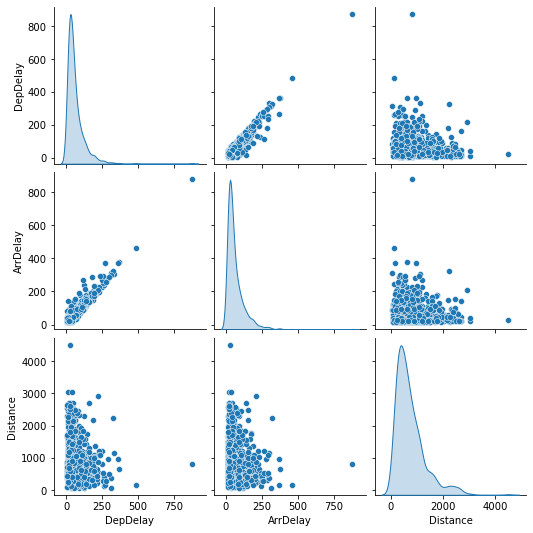

In [14]:
sns.pairplot(DFreduced, diag_kind='kde');

<span style=color:green><b>Train-Test split: with samples around 1000 samples, we can split 80%-20%. </span>

https://data-flair.training/blogs/train-test-set-in-python-ml/

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X, y = DFreduced.drop('ArrDelay',axis=1), DFreduced.ArrDelay
print(X.shape, y.shape)

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1000, 3) (1000,)
(800, 3) (200, 3) (800,) (200,)


In [17]:
X_train.describe().round(2)

,DepDelay,Distance
count,800.00,800.00
mean,60.34,741.23
std,62.42,559.76
min,6.00,74.00
25%,23.00,351.00
50%,43.00,589.00
75%,76.00,957.00
max,876.00,4502.00


In [18]:
X_test.describe().round(2)

,DepDelay,Distance
count,200.00,200.00
mean,58.74,755.77
std,61.27,559.13
min,6.00,74.00
25%,21.75,360.50
50%,37.50,593.00
75%,75.50,994.00
max,364.00,2586.00


<span style=color:green>*We observe that means and std devaition have less than 2% of variation from train and test samples*</span>

In [19]:
y_train.describe().round(2)

count    800.00
mean      64.56
std       63.72
min       15.00
25%       26.00
50%       43.00
75%       81.00
max      876.00
Name: ArrDelay, dtype: float64

In [20]:
y_test.describe().round(2)

count    200.00
mean      63.29
std       59.77
min       15.00
25%       24.00
50%       40.50
75%       82.25
max      375.00
Name: ArrDelay, dtype: float64

# <span style=color:darkblue>Nivell 2</span>

<u style=color:blue>Exercici 2:</u>

<span style=color:blue>Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).<span>

In [21]:
DFreduced.head()

,DepDelay,ArrDelay,Distance,UniqueCarrier
655485,6.0,18.0,619,EV
116991,113.0,103.0,89,MQ
122272,45.0,43.0,268,MQ
431879,110.0,115.0,268,OH
113258,103.0,108.0,533,FL


<span style=color:green>*Create dummy variables with 'Unique Carrier' variable*</span>

In [22]:
# Create dummy variables
dummy_UniqueCarrier_type = pd.get_dummies(DFreduced['UniqueCarrier'], prefix='UniqueCarrier', drop_first=True)

# Drop unnecessary columns
to_drop = ['UniqueCarrier']
DFreduced.drop(to_drop, axis=1, inplace=True)

# Merge into a single data frame
DFdummy = pd.concat([DFreduced, dummy_UniqueCarrier_type], axis=1)
DFdummy.head()

C:\Users\mio\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,DepDelay,ArrDelay,Distance,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
655485,6.0,18.0,619,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
116991,113.0,103.0,89,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
122272,45.0,43.0,268,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
431879,110.0,115.0,268,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
113258,103.0,108.0,533,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<span style=color:green>*Standardize numerical variables*</span>

https://interactivechaos.com/es/manual/tutorial-de-machine-learning/standard-scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_transformed = mms.fit_transform(DFdummy.iloc[:, :])

df_transformed = pd.DataFrame(df_transformed)

df_transformed.columns = DFdummy.columns

df_transformed.head()

,DepDelay,ArrDelay,Distance,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,0.000000,0.003484,0.123080,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.122989,0.102207,0.003388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.044828,0.032520,0.043812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.119540,0.116144,0.043812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.111494,0.108014,0.103659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# <span style=color:darkblue>Nivell 3</span>

<u style=color:blue>Exercici 3:</u>

<span style=color:blue>Resumeix les noves columnes generades de manera estadística i gràfica.<span>


In [24]:
df_transformed.describe().round(2)

,DepDelay,ArrDelay,Distance,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,...,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,0.06,0.06,0.15,0.11,0.02,0.03,0.04,0.07,0.04,0.01,...,0.00,0.08,0.04,0.03,0.06,0.09,0.04,0.16,0.06,0.04
std,0.07,0.07,0.13,0.32,0.13,0.18,0.19,0.25,0.20,0.11,...,0.03,0.27,0.21,0.17,0.23,0.28,0.20,0.37,0.24,0.19
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.02,0.01,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.04,0.03,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.08,0.08,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


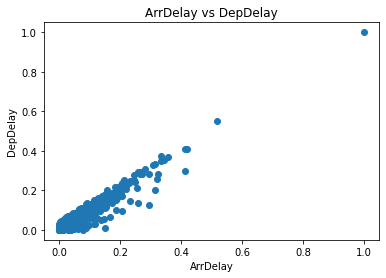

In [25]:
plt.scatter(df_transformed['ArrDelay'], df_transformed['DepDelay'])
plt.title("ArrDelay vs DepDelay")
plt.xlabel("ArrDelay")
plt.ylabel("DepDelay")
plt.show()

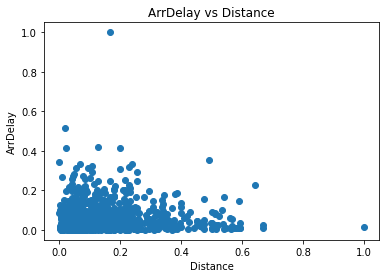

In [26]:
plt.scatter(df_transformed['Distance'], df_transformed['ArrDelay'])
plt.title("ArrDelay vs Distance")
plt.xlabel("Distance")
plt.ylabel("ArrDelay")
plt.show()